<h1 align="center">Péndulo simple en el espacio de fase.</h1>
<div align="right">David A. Miranda, PhD<br>2021</div>

En este Jupyter Notebook se analiza un ensamble formado por sistemas clásicos aislados cuyo comportamiento se puede modelar por un oscilador armónico simple en una dimensión. 

## 1. Importar libreraías

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

## 2. Planteamiento del problema
La energía $E$ de un oscilador armónico clásico está detemrinada por su masa $m$, la frencuencia angular de oscilación $\omega$ y la amplitud $A$,
$$E = \frac{1}{2}m\omega^2A^2$$

Al asumir que el sistema está aislado y su energía se encuentra en un valor entre $E$ y $E+\delta E$, la posición del sistema estará dada por $x = A sin(\omega t)$ y su momentum, $p = m \omega A cos(\omega t) = \pm m \omega \sqrt{A^2 - x^2}$.

Se quiere obtener el número de estados $\Omega(E;x)$ para los cuales el sistema se encuentra en la posición $x$ y la probabilidad $P(x)$ que el sistema se encuentre en dicha posición.

In [2]:
m = 1e-5 # kg
A = 1e-1 # m
w = 2 * np.pi * 1e6 # rad/s
x = np.linspace(-0.9999*A, 0.9999*A, 1000) 
p = m * w * np.sqrt( A**2 - x**2 )

## 3. Solución analítica
Note que el espacio de fase está dado por la Figura 1.

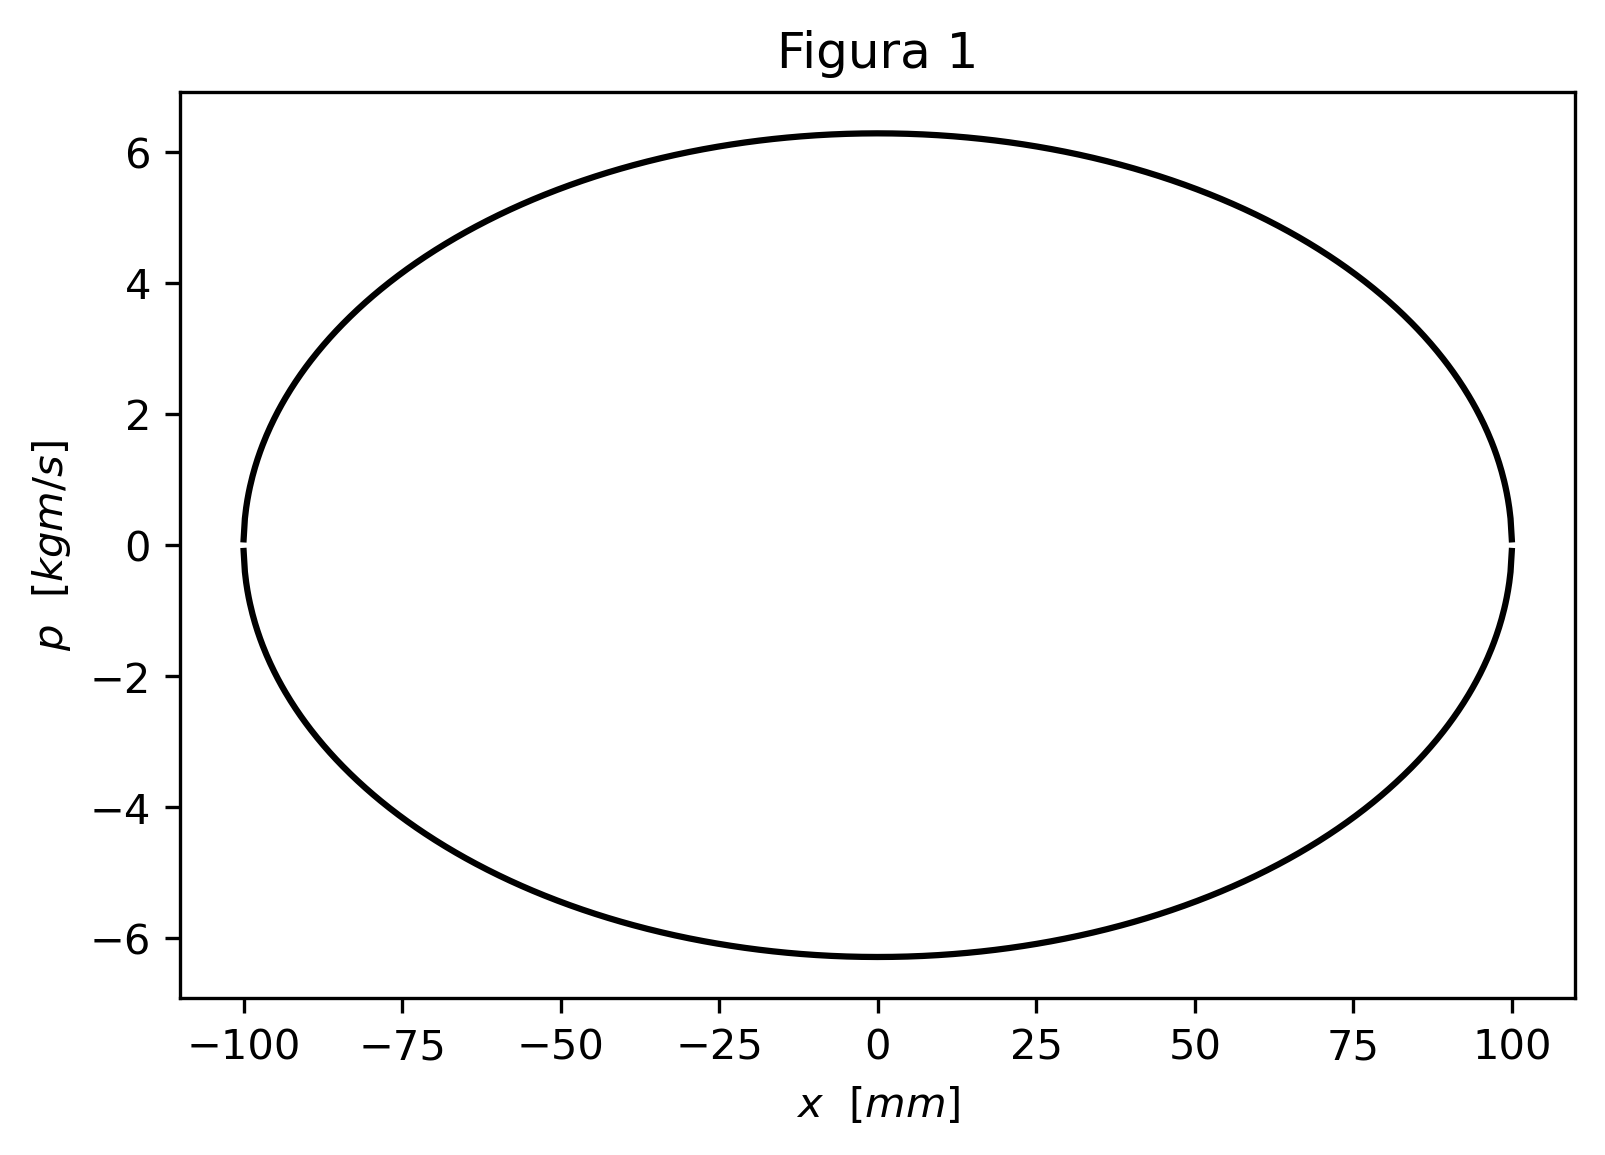

In [3]:
plt.figure(dpi=300)
plt.plot(1e3*x, p, 'k')
plt.plot(1e3*x, -p, 'k')
plt.xlabel(r'$x$  $[mm]$')
plt.ylabel(r'$p$  $[kg m/s]$')
_ = plt.title('Figura 1')

El volumen $v$ ocupado por el sistema en el espacio de fase se puede caluclar como la diferencia entre las áreas de dos elipses (nota: el área de una elipse es $\pi a b$, donde $a$ y $b$ son los ejes de la elipse):

$v$ = { (area de la elipse para $x + \delta x$) - (area de la elipse para $x$) }

Al calcular la diferencia entre las áreas de la elipse y despresiando los términos de orden superior se obtiene,

$$v =  2 \pi m\omega A \delta x$$

La probabilidad $P(x)$ que el sistema esté en una posición entre $x$ y $x + \delta x$ se puede obtener dividiendo el volumen $\delta v$ en el espacio de fase alrededor de dicha posición y el volumen total ocupado por el sistema $v$ en el espacio de fase.

$$P(x) = \frac{2 \delta x \delta p}{2 \pi m\omega A \delta x}$$

Dado que para un cierto valor de $x$ el momentum está dado por $p = m \omega \sqrt{A^2 - x^2}$, se tiene que $\delta p = \frac{m\omega A \delta x}{\sqrt{A^2 - x^2}}$:

$$P(x) = \frac{\delta x}{\pi \sqrt{A^2 - x^2}}$$

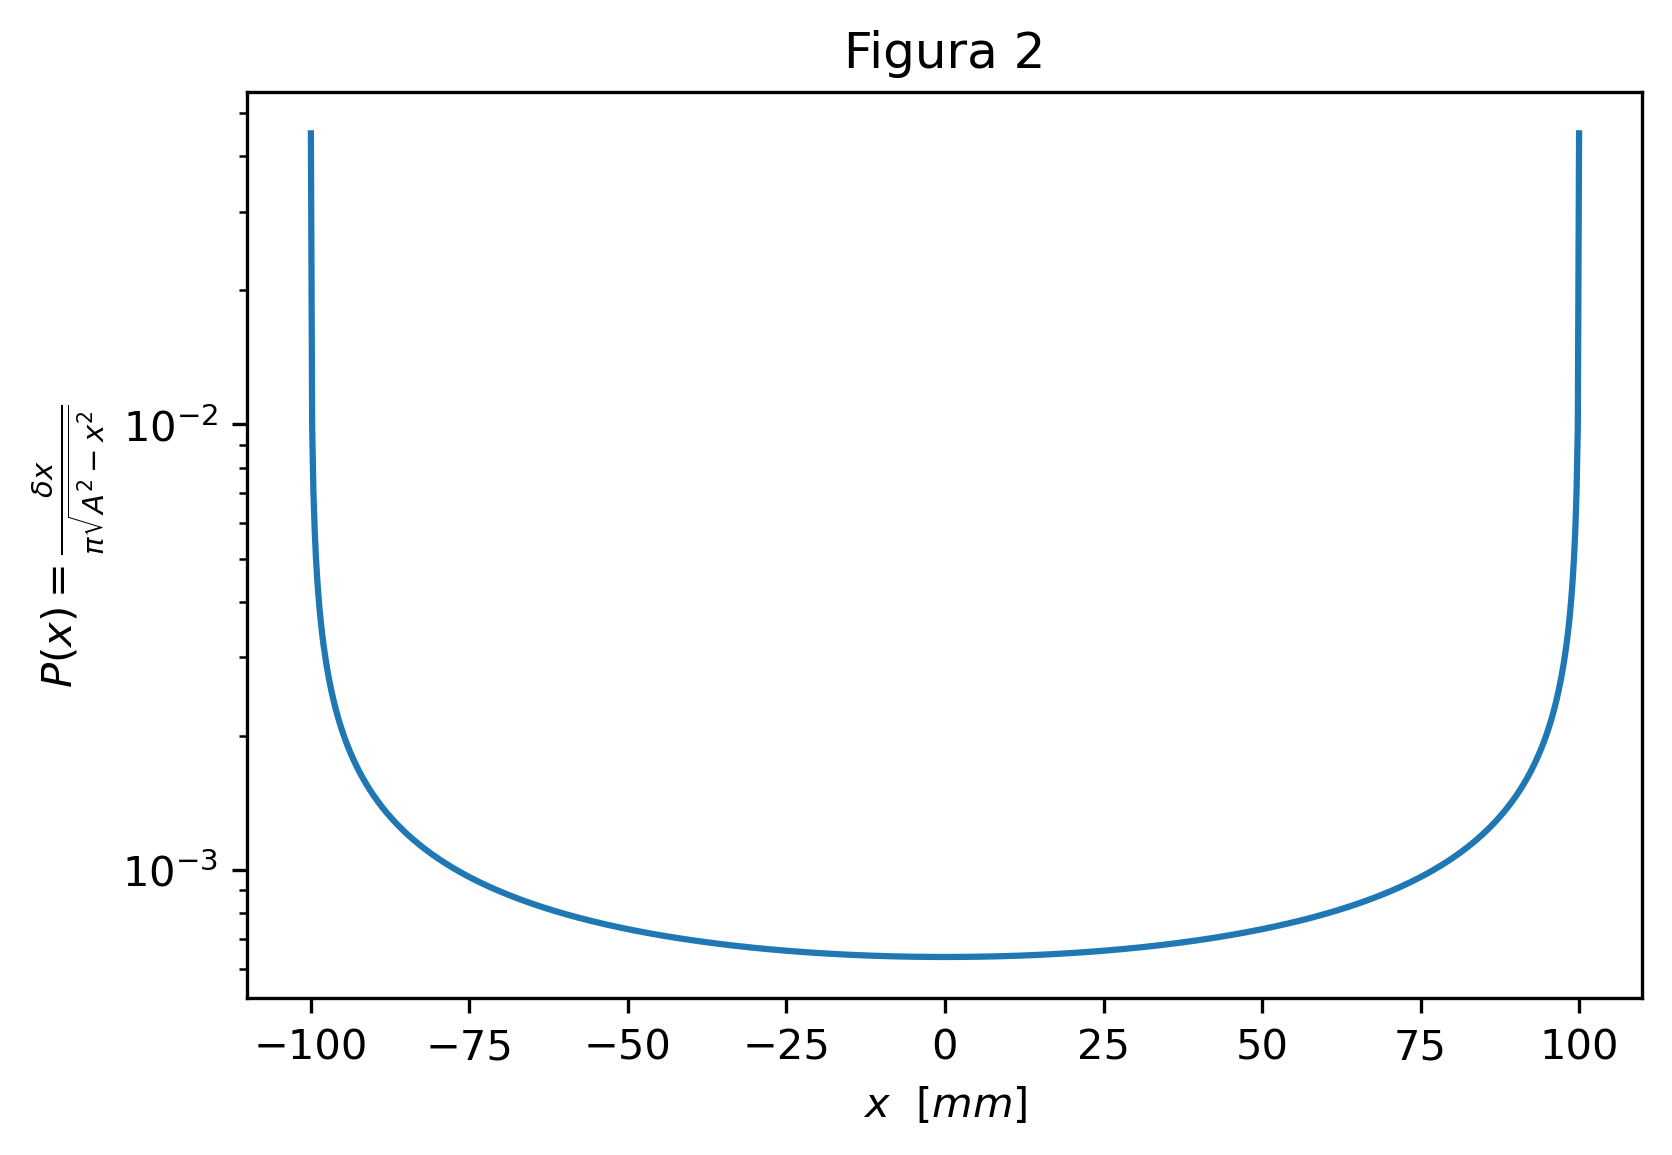

In [4]:
dx = x[1] - x[0]
P_teo = dx / ( np.pi * np.sqrt( A**2 - x**2 ) )
plt.figure(dpi=300)
plt.semilogy(1e3*x, P_teo)
plt.xlabel(r'$x$  $[mm]$')
plt.ylabel(r'$P(x) = \frac{\delta x}{\pi \sqrt{A^2 - x^2}}$')
_ = plt.title('Figura 2')

## 3. Modelado
Para modelar y simular este problema se asume lo siguiente.
### 3.1. Especificación del estado del sistema
Cada sistema se especifica por un único parámetro, su posición.  Note que, para este caso, el momento se puede obtener si se conoce la posición, por lo cual, solo se requiere la posición para especificar el estado del sistema. Esto quiere decir que la posición especifica al sistema y con solo este número es posible determinar su estado.

### 3.2. Postulado básico
Se asume que la observación de la popsición del sistema se puede hacer, con igual probabilidad, en cualquier tiempo.  Esto sugiere que se puede definir una variable aleatoria $T$ asociada a cada valor del tiempo $t$ en que se mide la posición del sistema.  Esto quiere decir que el tiempo $t$ se puede modelar con una variable aleatoria uniforme, $T$, es decir, una variable aletaoria con una [distribución uniforme continua](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_uniforme_continua).

### 3.3. Ensamble
Se puede constuir un ensamble conformado por $N$ sistemas preparados bajo las mismas condiciones.  En este caso cada sistema corresponde con una observación realizada en un determinado tiempo $t$.

3.4. Probabilidad
La probabilidad que el sistema se encuentre en una cierta posición $x$ estará dada por el cociente entre el número de estados $\Omega(E; x)$ y el número total de estados $\Omega(E)$. Note que $\Omega(E; x)$ se puede estimar en el ensamble a partir de la cuenta de los valores del ensamble entre $x$ y $x + \delta x$ y $\Omega(E)$, con el número de elementos en el ensamble.

## 4. Simulación
### 4.1. Definiciones

In [5]:
N = 1000
delta_x = 1e-2 * A # m
Tmax = 2 * np.pi / w; dT = Tmax / ( N-1 )
T = np.random.uniform(low=0, high=Tmax+dT, size=N)
X = A * np.sin(w * T)

In [6]:
def omega(x, dx = delta_x):
    Om = [np.count_nonzero( ( X >= xi ) & ( X < xi + dx)) for xi in x]
    return np.array(Om)

## 4.2. Número de microestados entre $x$ y $x + \delta x$

In [7]:
Omega_x = omega(X)
Omega = sum(Omega_x)

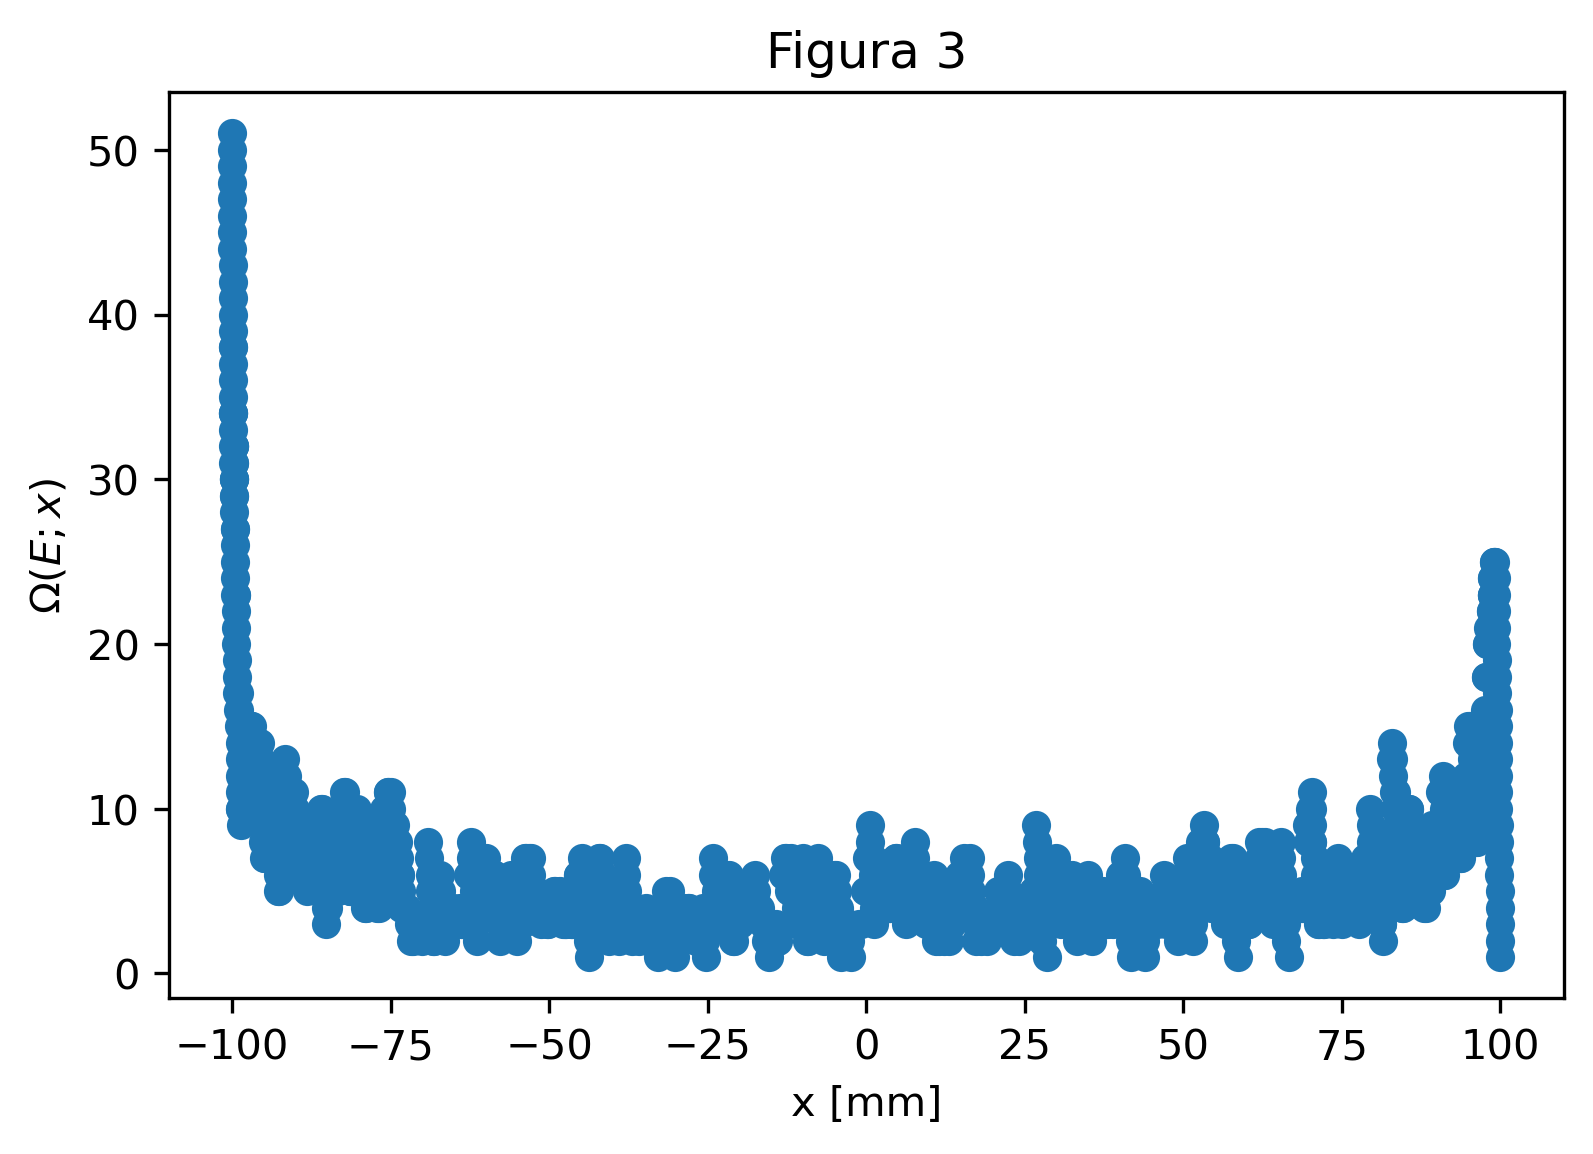

In [8]:
plt.figure(dpi=300)
plt.plot(1e3*X, Omega_x, 'o')
plt.xlabel('x [mm]')
plt.ylabel(r'$\Omega(E; x)$')
_ = plt.title('Figura 3')

## 4.3. Probabilidad $P(x)$ que el sistema se encuentre en una posición entre $x$ y $x + \delta x$

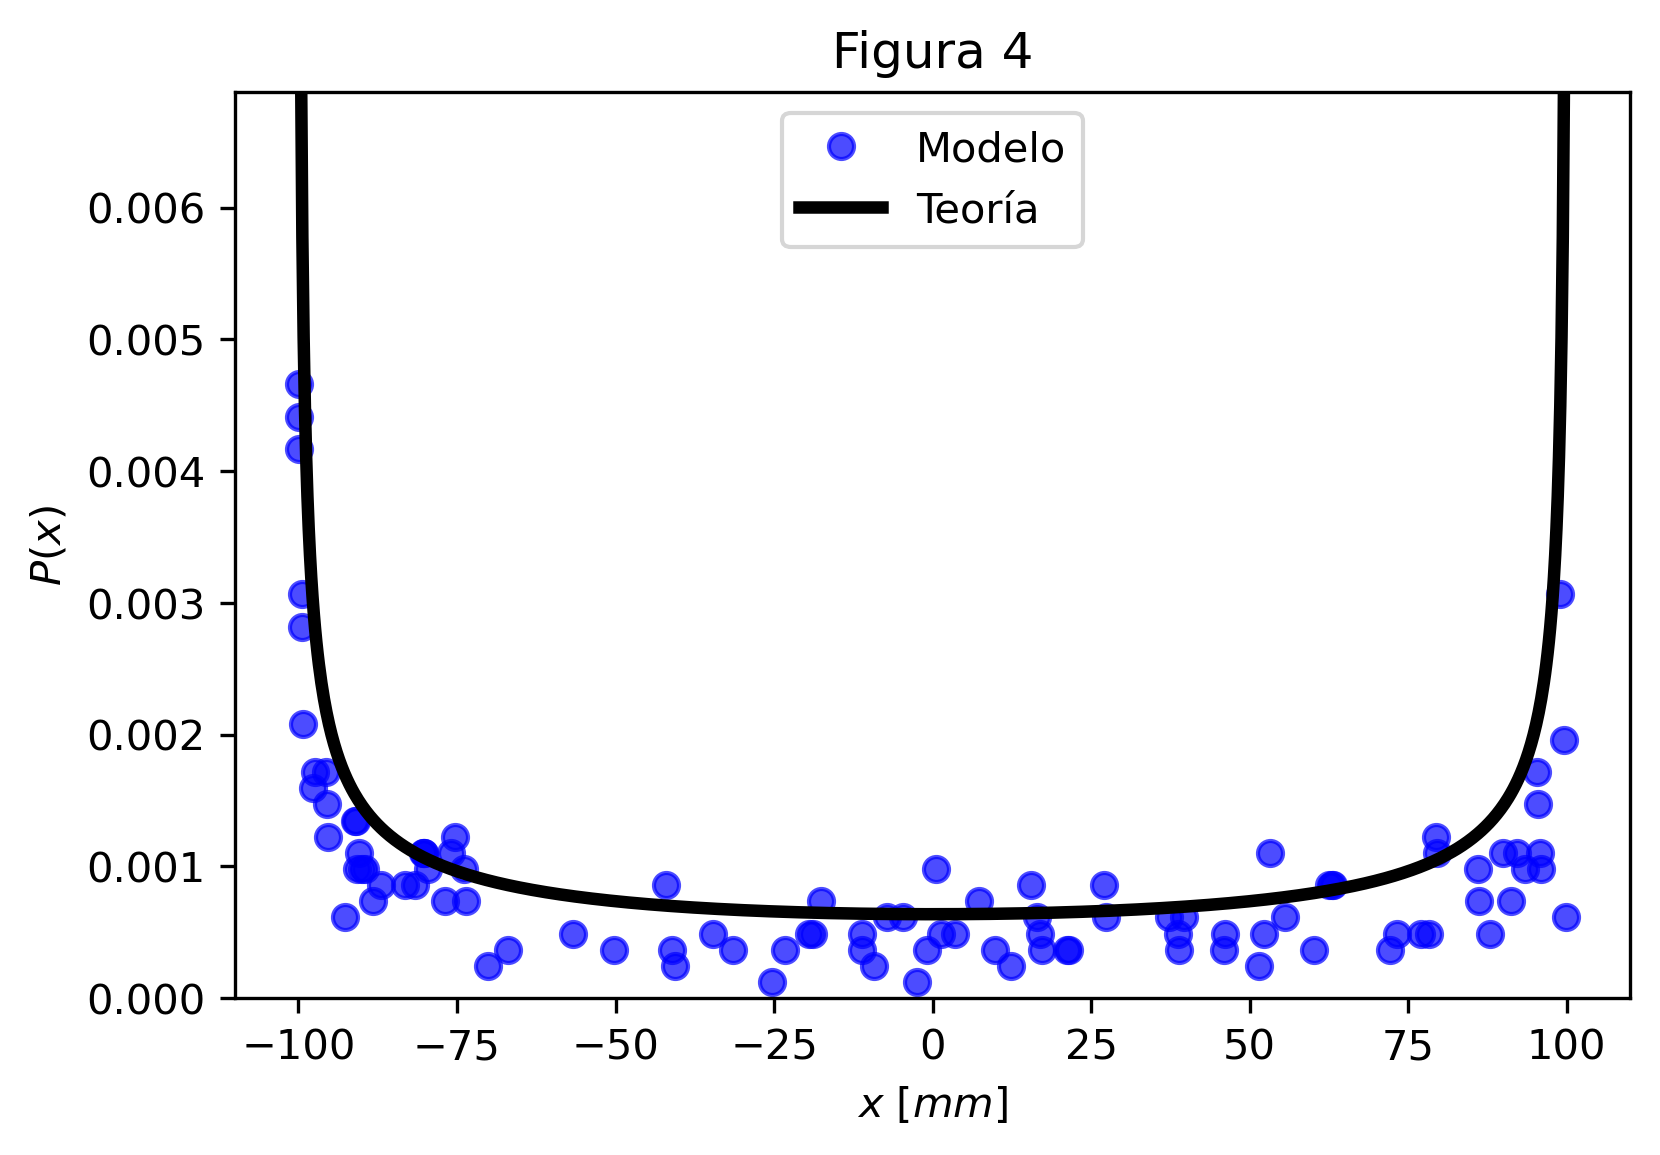

In [9]:
P_ens = Omega_x / Omega
k = np.int16(np.linspace(0, N-1, min(100, N)))
plt.figure(dpi=300)
plt.plot(1e3*X[k], P_ens[k], 'ob', label='Modelo', alpha=0.7)
plt.plot(1e3*x, P_teo, 'k', lw=3, label='Teoría')
plt.xlabel(r'$x$ $[mm]$')
plt.ylabel(r'$P(x)$')
plt.axis([-1.1e3*A, 1.1e3*A, 0, 1.1*max(P_ens)])
plt.legend()
_ = plt.title('Figura 4')

## 5. Preguntas de autoexplicación

En la línea 4 del ítem 2.1 se obtienen los valores de posición a partir del comando *x = np.linspace(-0.9999*A, 0.9999*A, 1000)*, ¿cuál es el propósito de multiplicar A por 0.9999?

End!